# Cluster Analysis: Implementation and Examples

**Objective:**<br />

- In this notebook, I will implement all the functions required to use clustering algorithm (K-Means, DBSCAN, BIRCH, Agglomerative clustering, Dendrogram).

**After this code:**<br />

- I will have a bunch of examples codes to future applications. Also, I implemented the k-means algorithm outside the sklearn package as a good exercise to understand better this algorithm. For this, I used mainly `scikit-learn` package.


Let's get started!

## 1 - Packages

Let's first import all the packages that you will need during this code.

- **pandas** is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language.
- **numPy** is a Python library used for working with arrays. It also has functions for working in domain of linear algebra, fourier transform, and matrices.
- **matplotlib** is a comprehensive library for creating static, animated, and interactive visualizations in Python.
- **scikit-learn** is a free machine learning library for Python.
- **sciPy** is a scientific computation library that uses NumPy underneath. SciPy stands for Scientific Python. It provides more utility functions for optimization, stats and signal processing.

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.metrics import euclidean_distances
from sklearn.cluster import DBSCAN
from sklearn.cluster import Birch
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

np.random.seed(13)
%matplotlib inline

## 2 - K-Means

K-Means Clustering may be the most widely known clustering algorithm and involves assigning examples to clusters in an effort to minimize the variance within each cluster.

### 2.1 Create data

(1500, 3)


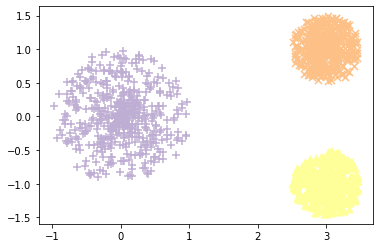

In [28]:
# define dataset
def_num_group = 500
max_radius = np.concatenate([np.ones(def_num_group) * 1.0, np.ones(def_num_group) * 0.5, np.ones(def_num_group) * 0.5])
x_center = np.concatenate([np.ones(def_num_group) * 0.0, np.ones(def_num_group) * 3.0, np.ones(def_num_group) * 3.0])
y_center = np.concatenate([np.ones(def_num_group) * 0.0, np.ones(def_num_group) * 1.0, np.ones(def_num_group) * -1.0])
clu = np.concatenate([np.ones(def_num_group) * 1, np.ones(def_num_group) * 2, np.ones(def_num_group) * 3])

radius = np.random.uniform(low = 0, high = 1, size = 3*def_num_group) * max_radius
theta = np.random.uniform(low = 0, high = 2 * np.pi, size = 3*def_num_group)

x, y = (radius * np.cos(theta), radius * np.sin(theta))
x += x_center
y += y_center

df = pd.DataFrame({'X' : x.round(2), 'Y' : y.round(2), 'clu' : clu.astype(int)})
print(df.shape)

markers = {1 : '+', 2 : 'x', 3 : '^'}
for clu in df['clu'].unique():
    plt.scatter(df['X'][df['clu'] == clu],
                df['Y'][df['clu'] == clu],
                s = 50,
                marker = markers[clu],
                color = plt.cm.Accent.colors[clu])

### 2.2 K-Means implementation
Here, I implement K-means algorithm to understand better how it works.

In [30]:
class KMeans_implementation():
    # A função abaixo inicializa os parâmetros do algoritmo
    def __init__(self, n_clusters, n_init):
        self.n_clusters, self.n_init = n_clusters, n_init

    # Roda uma iteracao do algoritmo KMeans, retornando os centroides e os labels
    def recalcula_centroides(self, X, centroides):
        try:
            labels = pairwise_distances_argmin(X, centroides)
        except:
            raise
        for c in range(self.n_clusters):
            centroides[c,:] = np.mean(X.loc[labels == c,:], axis = 0)
        return centroides, labels
        
    # A função abaixo roda o algoritmo e encontra os centroides finais
    def fit(self, X):
        melhor_score = np.inf
        for init in range(self.n_init):            
            centroides = np.random.uniform(low = X.min(), high = X.max(), size = (self.n_clusters, X.shape[1]))
            convergiu = False
            labels_anterior = np.zeros(X.shape[0])
            while not convergiu:
                try:
                    centroides, labels = self.recalcula_centroides(X, centroides)
                except:
                    self.fit(X)
                    return
                if np.all(labels == labels_anterior): convergiu = True
                else: labels_anterior = labels

            score_atual = 0
            for c in range(self.n_clusters):
                score_atual += sum(euclidean_distances(X.loc[labels == c,:], centroides[c,:].reshape(1, -1)))

            if score_atual < melhor_score:
                melhor_score = score_atual
                melhor_particao = labels

        self.labels_ = melhor_particao
        self.cluster_centers_ = centroides

    # A função abaixo encontra a qual cluster uma nova observação pertence
    def predict(self, X):
        return pairwise_distances_argmin(X, self.cluster_centers_)

    # A função abaixo combina as funções fit e predict
    def fit_predict(self, X):
        self.fit(X)
        return self.predict(X)

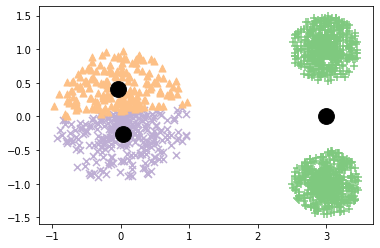

In [56]:
# Warning! Using only 1 initialization can give the "best place" to soon...
my_km = KMeans_implementation(n_clusters = 3, n_init = 1)
df['kmeans_my'] = my_km.fit_predict(df[['X','Y']])

markers = {0 : '+', 1 : 'x', 2 : '^'}
for clu in df['kmeans_my'].unique():
    plt.scatter(df['X'][df['kmeans_my'] == clu],
                df['Y'][df['kmeans_my'] == clu],
                s = 50,
                marker = markers[clu],
                color = plt.cm.Accent.colors[clu])
    
for centroide in my_km.cluster_centers_:
    plt.scatter(centroide[0], centroide[1], s = 250, c = 'black')

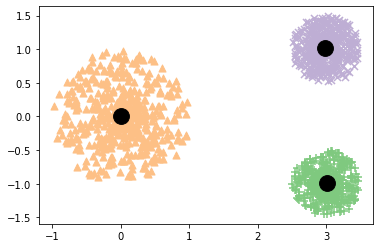

In [57]:
my_km = KMeans_implementation(n_clusters = 3, n_init = 1)
df['kmeans_my'] = my_km.fit_predict(df[['X','Y']])

markers = {0 : '+', 1 : 'x', 2 : '^'}
for clu in df['kmeans_my'].unique():
    plt.scatter(df['X'][df['kmeans_my'] == clu],
                df['Y'][df['kmeans_my'] == clu],
                s = 50,
                marker = markers[clu],
                color = plt.cm.Accent.colors[clu])
    
for centroide in my_km.cluster_centers_:
    plt.scatter(centroide[0], centroide[1], s = 250, c = 'black')

### 2.3 K-Means from scikit Learn

In [45]:
# Several initialization with k-means++ give better results!
km_skl = KMeans(n_clusters=3, n_init=10, init='k-means++')
df['kmeans_sklearn'] = km_skl.fit_predict(df[['X','Y']])

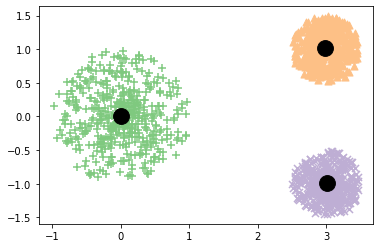

In [46]:
markers = {0 : '+', 1 : 'x', 2 : '^'}
for clu in df['kmeans_sklearn'].unique():
    plt.scatter(df['X'][df['kmeans_sklearn'] == clu],
                df['Y'][df['kmeans_sklearn'] == clu],
                s = 50,
                marker = markers[clu],
                color = plt.cm.Accent.colors[clu])
    
for centroide in km_skl.cluster_centers_:
    plt.scatter(centroide[0], centroide[1], s = 250, c = 'black')

### 2.4 K-Means from scikit learn applied to other dataset

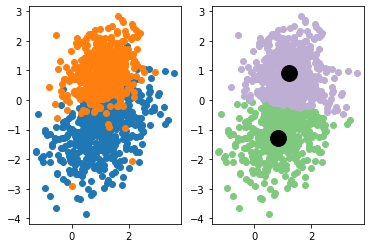

In [83]:
# define dataset
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1,
                           random_state=245) # Just change random_state to see other example

plt.subplot(1, 2, 1)
# create scatter plot for samples from each class
for class_value in range(2):
    # get row indexes for samples with this class
    row_ix = np.where(y == class_value)
    # create scatter of these samples
    plt.scatter(X[row_ix, 0], X[row_ix, 1])

km_skl_alter = KMeans(n_clusters=2, n_init=10, init='k-means++')
y_clust = km_skl_alter.fit_predict(X)

plt.subplot(1, 2, 2)
for clu in np.unique(y_clust):
    # get row indexes for samples with this cluster
    row_ix = np.where(y_clust == clu)
    # create scatter of these samples
    plt.scatter(X[row_ix, 0], X[row_ix, 1], color = plt.cm.Accent.colors[clu])

for centroide in km_skl_alter.cluster_centers_:
    plt.scatter(centroide[0], centroide[1], s = 250, c = 'black')
    
# show the plot
plt.show()

## 3 - DBSCAN

DBSCAN Clustering (where DBSCAN is short for Density-Based Spatial Clustering of Applications with Noise) involves finding high-density areas in the domain and expanding those areas of the feature space around them as clusters.

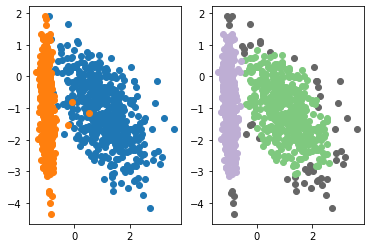

In [87]:
# define dataset
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1,
                           random_state=67) # Just change random_state to see other example

plt.subplot(1, 2, 1)
# create scatter plot for samples from each class
for class_value in range(2):
    # get row indexes for samples with this class
    row_ix = np.where(y == class_value)
    # create scatter of these samples
    plt.scatter(X[row_ix, 0], X[row_ix, 1])

# Several initialization with k-means++ give better results!
DBSCAN_model = DBSCAN(eps=0.30, min_samples=9)
y_clust = DBSCAN_model.fit_predict(X)

plt.subplot(1, 2, 2)
for clu in np.unique(y_clust):
    # get row indexes for samples with this cluster
    row_ix = np.where(y_clust == clu)
    # create scatter of these samples
    plt.scatter(X[row_ix, 0], X[row_ix, 1], color = plt.cm.Accent.colors[clu])

# show the plot
plt.show()

## 4 - BIRCH
BIRCH Clustering (BIRCH is short for Balanced Iterative Reducing and Clustering using Hierarchies) involves constructing a tree structure from which cluster centroids are extracted.

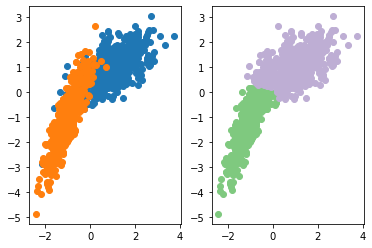

In [92]:
# define dataset
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1,
                           random_state=678) # Just change random_state to see other example

plt.subplot(1, 2, 1)
# create scatter plot for samples from each class
for class_value in range(2):
    # get row indexes for samples with this class
    row_ix = np.where(y == class_value)
    # create scatter of these samples
    plt.scatter(X[row_ix, 0], X[row_ix, 1])

Birch_model = Birch(threshold=0.01, n_clusters=2)
y_clust = Birch_model.fit_predict(X)

plt.subplot(1, 2, 2)
for clu in np.unique(y_clust):
    # get row indexes for samples with this cluster
    row_ix = np.where(y_clust == clu)
    # create scatter of these samples
    plt.scatter(X[row_ix, 0], X[row_ix, 1], color = plt.cm.Accent.colors[clu])

# show the plot
plt.show()

## 5 - Agglomerative clustering
Agglomerative clustering involves merging examples until the desired number of clusters is achieved. It is a part of a broader class of hierarchical clustering methods.

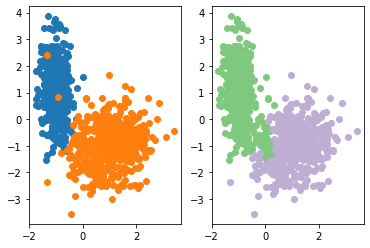

In [109]:
# define dataset
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1,
                           random_state=33) # Just change random_state to see other example

plt.subplot(1, 2, 1)
# create scatter plot for samples from each class
for class_value in range(2):
    # get row indexes for samples with this class
    row_ix = np.where(y == class_value)
    # create scatter of these samples
    plt.scatter(X[row_ix, 0], X[row_ix, 1])

AgglomerativeClustering_model = AgglomerativeClustering(n_clusters=2)
y_clust = AgglomerativeClustering_model.fit_predict(X)

plt.subplot(1, 2, 2)
for clu in np.unique(y_clust):
    # get row indexes for samples with this cluster
    row_ix = np.where(y_clust == clu)
    # create scatter of these samples
    plt.scatter(X[row_ix, 0], X[row_ix, 1], color = plt.cm.Accent.colors[clu])

# show the plot
plt.show()

## 6 - Dendrogram (Linkage)

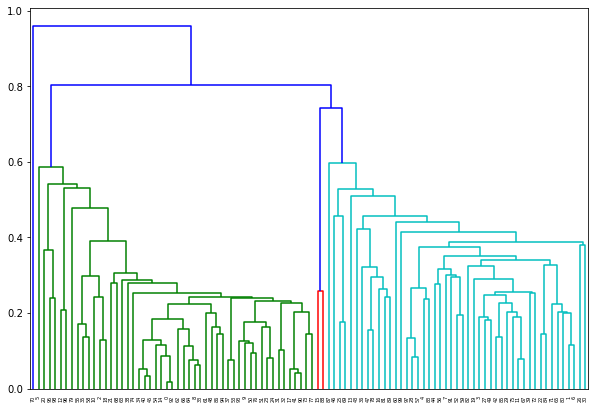

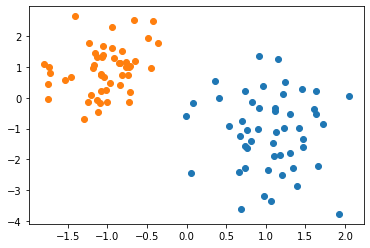

In [123]:
# define dataset
# Dendrogram is interesting to low n_samples.
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1,
                           random_state=8) # Just change random_state to see other example.

linked = linkage(X, 'single')

plt.figure(figsize=(10, 7))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.show()

for class_value in range(2):
    # get row indexes for samples with this class
    row_ix = np.where(y == class_value)
    # create scatter of these samples
    plt.scatter(X[row_ix, 0], X[row_ix, 1])
plt.show()